In [39]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

from epw import epw
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import plotly.express as px
import random
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def process_epw_file(file_path, verbose=False):
    # Initialize the EPW object
    a = epw()
    
    # Read the EPW file
    a.read(file_path)
    
    # Set the dataframe index to a datetime format
    a.dataframe.index = pd.to_datetime(a.dataframe[['Year', 'Month', 'Day', 'Hour', 'Minute']])
    
    if verbose:
        display(f"Data for months: {set(a.dataframe['Month'])}, years: {set(a.dataframe['Year'])}")
        # Display the keys of the dataframe
        keys = a.dataframe.keys()
        print("DataFrame Keys:", keys)
        
        # Display the unique years in the dataframe
        unique_years = set(a.dataframe["Year"])
        print("Unique Years:", unique_years)
    
        # Extract ground temperatures from headers
        ground_temps = a.headers["GROUND TEMPERATURES"]
        print("Number of Ground Temperature Entries:", len(ground_temps))
    
    # Calculate unique months
    uniqueMonths = a.dataframe.index[a.dataframe.index.day==15]
    uniqueMonths = uniqueMonths.year.values + uniqueMonths.month.values/100
    uniqueMonths = np.unique(uniqueMonths)
    num_unique_months = len(uniqueMonths)
    if num_unique_months != 12:
        raise ValueError(f"Number of unique months is not 12. Found {num_unique_months} unique months.")
    # Return the processed information
    return a.dataframe

In [3]:
climate_zones = {
    1: {
        "City": "Arcata",
        "Latitude": 41.0,
        "Longitude": 124.1,
        "Elevation": 203,
        "WeatherFile": "CA_ARCATA-AP_725945S_CZ2022"
    },
    2: {
        "City": "Santa Rosa",
        "Latitude": 38.5,
        "Longitude": 122.8,
        "Elevation": 125,
        "WeatherFile": "CA_SANTA-ROSA-AP_724957S_CZ2022"
    },
    3: {
        "City": "Oakland",
        "Latitude": 37.7,
        "Longitude": 122.2,
        "Elevation": 6,
        "WeatherFile": "CA_OAKLAND-METRO-AP_724930S_CZ2022"
    },
    4: {
        "City": "San Jose-Reid",
        "Latitude": 37.3,
        "Longitude": 121.8,
        "Elevation": 135,
        "WeatherFile": "CA_SAN-JOSE-REID-HILLV_724946S_CZ2022"
    },
    5: {
        "City": "Santa Maria",
        "Latitude": 34.9,
        "Longitude": 120.4,
        "Elevation": 253,
        "WeatherFile": "CA_SANTA-MARIA-PUBLIC-AP_723940S_CZ2022"
    },
    6: {
        "City": "Torrance",
        "Latitude": 33.8,
        "Longitude": 118.3,
        "Elevation": 88,
        "WeatherFile": "CA_TORRANCE-MUNI-AP_722955S_CZ2022"
    },
    7: {
        "City": "San Diego-Lindbergh",
        "Latitude": 32.7,
        "Longitude": 117.2,
        "Elevation": 13,
        "WeatherFile": "CA_SAN-DIEGO-LINDBERGH-FLD_722900S_CZ2022"
    },
    8: {
        "City": "Fullerton",
        "Latitude": 33.9,
        "Longitude": 118.0,
        "Elevation": 95,
        "WeatherFile": "CA_FULLERTON-MUNI-AP_722976S_CZ2022"
    },
    9: {
        "City": "Burbank-Glendale",
        "Latitude": 34.2,
        "Longitude": 118.3,
        "Elevation": 741,
        "WeatherFile": "CA_BURBANK-GLNDLE-PASAD-AP_722880S_CZ2022"
    },
    10: {
        "City": "Riverside",
        "Latitude": 33.9,
        "Longitude": 117.4,
        "Elevation": 840,
        "WeatherFile": "CA_RIVERSIDE-MUNI_722869S_CZ2022"
    },
    11: {
        "City": "Red Bluff",
        "Latitude": 40.1,
        "Longitude": 122.2,
        "Elevation": 348,
        "WeatherFile": "CA_RED-BLUFF-MUNI-AP_725910S_CZ2022"
    },
    12: {
        "City": "Sacramento",
        "Latitude": 38.5,
        "Longitude": 121.5,
        "Elevation": 16,
        "WeatherFile": "CA_SACRAMENTO-EXECUTIVE-AP_724830S_CZ2022"
    },
    13: {
        "City": "Fresno",
        "Latitude": 36.8,
        "Longitude": 119.7,
        "Elevation": 335,
        "WeatherFile": "CA_FRESNO-YOSEMITE-IAP_723890S_CZ2022"
    },
    14: {
        "City": "Palmdale",
        "Latitude": 34.6,
        "Longitude": 118.0,
        "Elevation": 2523,
        "WeatherFile": "CA_PALMDALE-AP_723820S_CZ2022"
    },
    15: {
        "City": "Palm Springs-Intl",
        "Latitude": 33.8,
        "Longitude": 116.5,
        "Elevation": 475,
        "WeatherFile": "CA_PALM-SPRINGS-IAP_722868S_CZ2022"
    },
    16: {
        "City": "Blue Canyon",
        "Latitude": 39.2,
        "Longitude": 120.7,
        "Elevation": 5279,
        "WeatherFile": "CA_BLUE-CANYON-AP_725845S_CZ2022"
    }
}
pd.DataFrame(climate_zones).T.to_csv("./weather/CA_climate_zones.csv")

In [7]:
climate_zones = pd.read_csv("./weather/CA_climate_zones.csv", index_col=0).to_dict(orient="index")
data = pd.DataFrame()
for zone, info in climate_zones.items():
    epw_file = f"./weather/CAClimateZones/{info['WeatherFile']}/{info['WeatherFile']}.epw"
    zoneData = process_epw_file(epw_file, verbose=True)
    zoneData["City"] = info["City"]
    zoneData["Latitude"] = info["Latitude"]
    zoneData["Longitude"] = info["Longitude"]
    zoneData["Elevation"] = info["Elevation"]
    zoneData["ClimateZone"] = zone
    data = pd.concat([data, zoneData], axis="index")
    pass


'Data for months: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}, years: {2017, 2004, 2005, 2006, 2008, 2011, 2012, 2013, 2014}'

DataFrame Keys: Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Data Source and Uncertainty Flags', 'Dry Bulb Temperature',
       'Dew Point Temperature', 'Relative Humidity',
       'Atmospheric Station Pressure', 'Extraterrestrial Horizontal Radiation',
       'Extraterrestrial Direct Normal Radiation',
       'Horizontal Infrared Radiation Intensity',
       'Global Horizontal Radiation', 'Direct Normal Radiation',
       'Diffuse Horizontal Radiation', 'Global Horizontal Illuminance',
       'Direct Normal Illuminance', 'Diffuse Horizontal Illuminance',
       'Zenith Luminance', 'Wind Direction', 'Wind Speed', 'Total Sky Cover',
       'Opaque Sky Cover (used if Horizontal IR Intensity missing)',
       'Visibility', 'Ceiling Height', 'Present Weather Observation',
       'Present Weather Codes', 'Precipitable Water', 'Aerosol Optical Depth',
       'Snow Depth', 'Days Since Last Snowfall', 'Albedo',
       'Liquid Precipitation Depth', 'Liquid Precipitation Quantity'],


'Data for months: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}, years: {2017, 2004, 2005, 2006, 2008, 2011, 2012, 2013, 2014}'

DataFrame Keys: Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Data Source and Uncertainty Flags', 'Dry Bulb Temperature',
       'Dew Point Temperature', 'Relative Humidity',
       'Atmospheric Station Pressure', 'Extraterrestrial Horizontal Radiation',
       'Extraterrestrial Direct Normal Radiation',
       'Horizontal Infrared Radiation Intensity',
       'Global Horizontal Radiation', 'Direct Normal Radiation',
       'Diffuse Horizontal Radiation', 'Global Horizontal Illuminance',
       'Direct Normal Illuminance', 'Diffuse Horizontal Illuminance',
       'Zenith Luminance', 'Wind Direction', 'Wind Speed', 'Total Sky Cover',
       'Opaque Sky Cover (used if Horizontal IR Intensity missing)',
       'Visibility', 'Ceiling Height', 'Present Weather Observation',
       'Present Weather Codes', 'Precipitable Water', 'Aerosol Optical Depth',
       'Snow Depth', 'Days Since Last Snowfall', 'Albedo',
       'Liquid Precipitation Depth', 'Liquid Precipitation Quantity'],


'Data for months: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}, years: {2017, 2004, 2005, 2006, 2008, 2011, 2012, 2013, 2014}'

DataFrame Keys: Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Data Source and Uncertainty Flags', 'Dry Bulb Temperature',
       'Dew Point Temperature', 'Relative Humidity',
       'Atmospheric Station Pressure', 'Extraterrestrial Horizontal Radiation',
       'Extraterrestrial Direct Normal Radiation',
       'Horizontal Infrared Radiation Intensity',
       'Global Horizontal Radiation', 'Direct Normal Radiation',
       'Diffuse Horizontal Radiation', 'Global Horizontal Illuminance',
       'Direct Normal Illuminance', 'Diffuse Horizontal Illuminance',
       'Zenith Luminance', 'Wind Direction', 'Wind Speed', 'Total Sky Cover',
       'Opaque Sky Cover (used if Horizontal IR Intensity missing)',
       'Visibility', 'Ceiling Height', 'Present Weather Observation',
       'Present Weather Codes', 'Precipitable Water', 'Aerosol Optical Depth',
       'Snow Depth', 'Days Since Last Snowfall', 'Albedo',
       'Liquid Precipitation Depth', 'Liquid Precipitation Quantity'],


'Data for months: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}, years: {2017, 2004, 2005, 2006, 2008, 2011, 2012, 2013, 2014}'

DataFrame Keys: Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Data Source and Uncertainty Flags', 'Dry Bulb Temperature',
       'Dew Point Temperature', 'Relative Humidity',
       'Atmospheric Station Pressure', 'Extraterrestrial Horizontal Radiation',
       'Extraterrestrial Direct Normal Radiation',
       'Horizontal Infrared Radiation Intensity',
       'Global Horizontal Radiation', 'Direct Normal Radiation',
       'Diffuse Horizontal Radiation', 'Global Horizontal Illuminance',
       'Direct Normal Illuminance', 'Diffuse Horizontal Illuminance',
       'Zenith Luminance', 'Wind Direction', 'Wind Speed', 'Total Sky Cover',
       'Opaque Sky Cover (used if Horizontal IR Intensity missing)',
       'Visibility', 'Ceiling Height', 'Present Weather Observation',
       'Present Weather Codes', 'Precipitable Water', 'Aerosol Optical Depth',
       'Snow Depth', 'Days Since Last Snowfall', 'Albedo',
       'Liquid Precipitation Depth', 'Liquid Precipitation Quantity'],


'Data for months: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}, years: {2017, 2004, 2005, 2006, 2008, 2011, 2012, 2013, 2014}'

DataFrame Keys: Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Data Source and Uncertainty Flags', 'Dry Bulb Temperature',
       'Dew Point Temperature', 'Relative Humidity',
       'Atmospheric Station Pressure', 'Extraterrestrial Horizontal Radiation',
       'Extraterrestrial Direct Normal Radiation',
       'Horizontal Infrared Radiation Intensity',
       'Global Horizontal Radiation', 'Direct Normal Radiation',
       'Diffuse Horizontal Radiation', 'Global Horizontal Illuminance',
       'Direct Normal Illuminance', 'Diffuse Horizontal Illuminance',
       'Zenith Luminance', 'Wind Direction', 'Wind Speed', 'Total Sky Cover',
       'Opaque Sky Cover (used if Horizontal IR Intensity missing)',
       'Visibility', 'Ceiling Height', 'Present Weather Observation',
       'Present Weather Codes', 'Precipitable Water', 'Aerosol Optical Depth',
       'Snow Depth', 'Days Since Last Snowfall', 'Albedo',
       'Liquid Precipitation Depth', 'Liquid Precipitation Quantity'],


'Data for months: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}, years: {2017, 2004, 2005, 2006, 2008, 2011, 2012, 2013, 2014}'

DataFrame Keys: Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Data Source and Uncertainty Flags', 'Dry Bulb Temperature',
       'Dew Point Temperature', 'Relative Humidity',
       'Atmospheric Station Pressure', 'Extraterrestrial Horizontal Radiation',
       'Extraterrestrial Direct Normal Radiation',
       'Horizontal Infrared Radiation Intensity',
       'Global Horizontal Radiation', 'Direct Normal Radiation',
       'Diffuse Horizontal Radiation', 'Global Horizontal Illuminance',
       'Direct Normal Illuminance', 'Diffuse Horizontal Illuminance',
       'Zenith Luminance', 'Wind Direction', 'Wind Speed', 'Total Sky Cover',
       'Opaque Sky Cover (used if Horizontal IR Intensity missing)',
       'Visibility', 'Ceiling Height', 'Present Weather Observation',
       'Present Weather Codes', 'Precipitable Water', 'Aerosol Optical Depth',
       'Snow Depth', 'Days Since Last Snowfall', 'Albedo',
       'Liquid Precipitation Depth', 'Liquid Precipitation Quantity'],


'Data for months: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}, years: {2017, 2004, 2005, 2006, 2008, 2011, 2012, 2013, 2014}'

DataFrame Keys: Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Data Source and Uncertainty Flags', 'Dry Bulb Temperature',
       'Dew Point Temperature', 'Relative Humidity',
       'Atmospheric Station Pressure', 'Extraterrestrial Horizontal Radiation',
       'Extraterrestrial Direct Normal Radiation',
       'Horizontal Infrared Radiation Intensity',
       'Global Horizontal Radiation', 'Direct Normal Radiation',
       'Diffuse Horizontal Radiation', 'Global Horizontal Illuminance',
       'Direct Normal Illuminance', 'Diffuse Horizontal Illuminance',
       'Zenith Luminance', 'Wind Direction', 'Wind Speed', 'Total Sky Cover',
       'Opaque Sky Cover (used if Horizontal IR Intensity missing)',
       'Visibility', 'Ceiling Height', 'Present Weather Observation',
       'Present Weather Codes', 'Precipitable Water', 'Aerosol Optical Depth',
       'Snow Depth', 'Days Since Last Snowfall', 'Albedo',
       'Liquid Precipitation Depth', 'Liquid Precipitation Quantity'],


'Data for months: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}, years: {2017, 2004, 2005, 2006, 2008, 2011, 2012, 2013, 2014}'

DataFrame Keys: Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Data Source and Uncertainty Flags', 'Dry Bulb Temperature',
       'Dew Point Temperature', 'Relative Humidity',
       'Atmospheric Station Pressure', 'Extraterrestrial Horizontal Radiation',
       'Extraterrestrial Direct Normal Radiation',
       'Horizontal Infrared Radiation Intensity',
       'Global Horizontal Radiation', 'Direct Normal Radiation',
       'Diffuse Horizontal Radiation', 'Global Horizontal Illuminance',
       'Direct Normal Illuminance', 'Diffuse Horizontal Illuminance',
       'Zenith Luminance', 'Wind Direction', 'Wind Speed', 'Total Sky Cover',
       'Opaque Sky Cover (used if Horizontal IR Intensity missing)',
       'Visibility', 'Ceiling Height', 'Present Weather Observation',
       'Present Weather Codes', 'Precipitable Water', 'Aerosol Optical Depth',
       'Snow Depth', 'Days Since Last Snowfall', 'Albedo',
       'Liquid Precipitation Depth', 'Liquid Precipitation Quantity'],


'Data for months: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}, years: {2017, 2004, 2005, 2006, 2008, 2011, 2012, 2013, 2014}'

DataFrame Keys: Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Data Source and Uncertainty Flags', 'Dry Bulb Temperature',
       'Dew Point Temperature', 'Relative Humidity',
       'Atmospheric Station Pressure', 'Extraterrestrial Horizontal Radiation',
       'Extraterrestrial Direct Normal Radiation',
       'Horizontal Infrared Radiation Intensity',
       'Global Horizontal Radiation', 'Direct Normal Radiation',
       'Diffuse Horizontal Radiation', 'Global Horizontal Illuminance',
       'Direct Normal Illuminance', 'Diffuse Horizontal Illuminance',
       'Zenith Luminance', 'Wind Direction', 'Wind Speed', 'Total Sky Cover',
       'Opaque Sky Cover (used if Horizontal IR Intensity missing)',
       'Visibility', 'Ceiling Height', 'Present Weather Observation',
       'Present Weather Codes', 'Precipitable Water', 'Aerosol Optical Depth',
       'Snow Depth', 'Days Since Last Snowfall', 'Albedo',
       'Liquid Precipitation Depth', 'Liquid Precipitation Quantity'],


'Data for months: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}, years: {2017, 2004, 2005, 2006, 2008, 2011, 2012, 2013, 2014}'

DataFrame Keys: Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Data Source and Uncertainty Flags', 'Dry Bulb Temperature',
       'Dew Point Temperature', 'Relative Humidity',
       'Atmospheric Station Pressure', 'Extraterrestrial Horizontal Radiation',
       'Extraterrestrial Direct Normal Radiation',
       'Horizontal Infrared Radiation Intensity',
       'Global Horizontal Radiation', 'Direct Normal Radiation',
       'Diffuse Horizontal Radiation', 'Global Horizontal Illuminance',
       'Direct Normal Illuminance', 'Diffuse Horizontal Illuminance',
       'Zenith Luminance', 'Wind Direction', 'Wind Speed', 'Total Sky Cover',
       'Opaque Sky Cover (used if Horizontal IR Intensity missing)',
       'Visibility', 'Ceiling Height', 'Present Weather Observation',
       'Present Weather Codes', 'Precipitable Water', 'Aerosol Optical Depth',
       'Snow Depth', 'Days Since Last Snowfall', 'Albedo',
       'Liquid Precipitation Depth', 'Liquid Precipitation Quantity'],


'Data for months: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}, years: {2017, 2004, 2005, 2006, 2008, 2011, 2012, 2013, 2014}'

DataFrame Keys: Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Data Source and Uncertainty Flags', 'Dry Bulb Temperature',
       'Dew Point Temperature', 'Relative Humidity',
       'Atmospheric Station Pressure', 'Extraterrestrial Horizontal Radiation',
       'Extraterrestrial Direct Normal Radiation',
       'Horizontal Infrared Radiation Intensity',
       'Global Horizontal Radiation', 'Direct Normal Radiation',
       'Diffuse Horizontal Radiation', 'Global Horizontal Illuminance',
       'Direct Normal Illuminance', 'Diffuse Horizontal Illuminance',
       'Zenith Luminance', 'Wind Direction', 'Wind Speed', 'Total Sky Cover',
       'Opaque Sky Cover (used if Horizontal IR Intensity missing)',
       'Visibility', 'Ceiling Height', 'Present Weather Observation',
       'Present Weather Codes', 'Precipitable Water', 'Aerosol Optical Depth',
       'Snow Depth', 'Days Since Last Snowfall', 'Albedo',
       'Liquid Precipitation Depth', 'Liquid Precipitation Quantity'],


'Data for months: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}, years: {2017, 2004, 2005, 2006, 2008, 2011, 2012, 2013, 2014}'

DataFrame Keys: Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Data Source and Uncertainty Flags', 'Dry Bulb Temperature',
       'Dew Point Temperature', 'Relative Humidity',
       'Atmospheric Station Pressure', 'Extraterrestrial Horizontal Radiation',
       'Extraterrestrial Direct Normal Radiation',
       'Horizontal Infrared Radiation Intensity',
       'Global Horizontal Radiation', 'Direct Normal Radiation',
       'Diffuse Horizontal Radiation', 'Global Horizontal Illuminance',
       'Direct Normal Illuminance', 'Diffuse Horizontal Illuminance',
       'Zenith Luminance', 'Wind Direction', 'Wind Speed', 'Total Sky Cover',
       'Opaque Sky Cover (used if Horizontal IR Intensity missing)',
       'Visibility', 'Ceiling Height', 'Present Weather Observation',
       'Present Weather Codes', 'Precipitable Water', 'Aerosol Optical Depth',
       'Snow Depth', 'Days Since Last Snowfall', 'Albedo',
       'Liquid Precipitation Depth', 'Liquid Precipitation Quantity'],


'Data for months: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}, years: {2017, 2004, 2005, 2006, 2008, 2011, 2012, 2013, 2014}'

DataFrame Keys: Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Data Source and Uncertainty Flags', 'Dry Bulb Temperature',
       'Dew Point Temperature', 'Relative Humidity',
       'Atmospheric Station Pressure', 'Extraterrestrial Horizontal Radiation',
       'Extraterrestrial Direct Normal Radiation',
       'Horizontal Infrared Radiation Intensity',
       'Global Horizontal Radiation', 'Direct Normal Radiation',
       'Diffuse Horizontal Radiation', 'Global Horizontal Illuminance',
       'Direct Normal Illuminance', 'Diffuse Horizontal Illuminance',
       'Zenith Luminance', 'Wind Direction', 'Wind Speed', 'Total Sky Cover',
       'Opaque Sky Cover (used if Horizontal IR Intensity missing)',
       'Visibility', 'Ceiling Height', 'Present Weather Observation',
       'Present Weather Codes', 'Precipitable Water', 'Aerosol Optical Depth',
       'Snow Depth', 'Days Since Last Snowfall', 'Albedo',
       'Liquid Precipitation Depth', 'Liquid Precipitation Quantity'],


'Data for months: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}, years: {2017, 2004, 2005, 2006, 2008, 2011, 2012, 2013, 2014}'

DataFrame Keys: Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Data Source and Uncertainty Flags', 'Dry Bulb Temperature',
       'Dew Point Temperature', 'Relative Humidity',
       'Atmospheric Station Pressure', 'Extraterrestrial Horizontal Radiation',
       'Extraterrestrial Direct Normal Radiation',
       'Horizontal Infrared Radiation Intensity',
       'Global Horizontal Radiation', 'Direct Normal Radiation',
       'Diffuse Horizontal Radiation', 'Global Horizontal Illuminance',
       'Direct Normal Illuminance', 'Diffuse Horizontal Illuminance',
       'Zenith Luminance', 'Wind Direction', 'Wind Speed', 'Total Sky Cover',
       'Opaque Sky Cover (used if Horizontal IR Intensity missing)',
       'Visibility', 'Ceiling Height', 'Present Weather Observation',
       'Present Weather Codes', 'Precipitable Water', 'Aerosol Optical Depth',
       'Snow Depth', 'Days Since Last Snowfall', 'Albedo',
       'Liquid Precipitation Depth', 'Liquid Precipitation Quantity'],


'Data for months: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}, years: {2017, 2004, 2005, 2006, 2008, 2011, 2012, 2013, 2014}'

DataFrame Keys: Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Data Source and Uncertainty Flags', 'Dry Bulb Temperature',
       'Dew Point Temperature', 'Relative Humidity',
       'Atmospheric Station Pressure', 'Extraterrestrial Horizontal Radiation',
       'Extraterrestrial Direct Normal Radiation',
       'Horizontal Infrared Radiation Intensity',
       'Global Horizontal Radiation', 'Direct Normal Radiation',
       'Diffuse Horizontal Radiation', 'Global Horizontal Illuminance',
       'Direct Normal Illuminance', 'Diffuse Horizontal Illuminance',
       'Zenith Luminance', 'Wind Direction', 'Wind Speed', 'Total Sky Cover',
       'Opaque Sky Cover (used if Horizontal IR Intensity missing)',
       'Visibility', 'Ceiling Height', 'Present Weather Observation',
       'Present Weather Codes', 'Precipitable Water', 'Aerosol Optical Depth',
       'Snow Depth', 'Days Since Last Snowfall', 'Albedo',
       'Liquid Precipitation Depth', 'Liquid Precipitation Quantity'],


'Data for months: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}, years: {2017, 2004, 2005, 2006, 2008, 2011, 2012, 2013, 2014}'

DataFrame Keys: Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Data Source and Uncertainty Flags', 'Dry Bulb Temperature',
       'Dew Point Temperature', 'Relative Humidity',
       'Atmospheric Station Pressure', 'Extraterrestrial Horizontal Radiation',
       'Extraterrestrial Direct Normal Radiation',
       'Horizontal Infrared Radiation Intensity',
       'Global Horizontal Radiation', 'Direct Normal Radiation',
       'Diffuse Horizontal Radiation', 'Global Horizontal Illuminance',
       'Direct Normal Illuminance', 'Diffuse Horizontal Illuminance',
       'Zenith Luminance', 'Wind Direction', 'Wind Speed', 'Total Sky Cover',
       'Opaque Sky Cover (used if Horizontal IR Intensity missing)',
       'Visibility', 'Ceiling Height', 'Present Weather Observation',
       'Present Weather Codes', 'Precipitable Water', 'Aerosol Optical Depth',
       'Snow Depth', 'Days Since Last Snowfall', 'Albedo',
       'Liquid Precipitation Depth', 'Liquid Precipitation Quantity'],


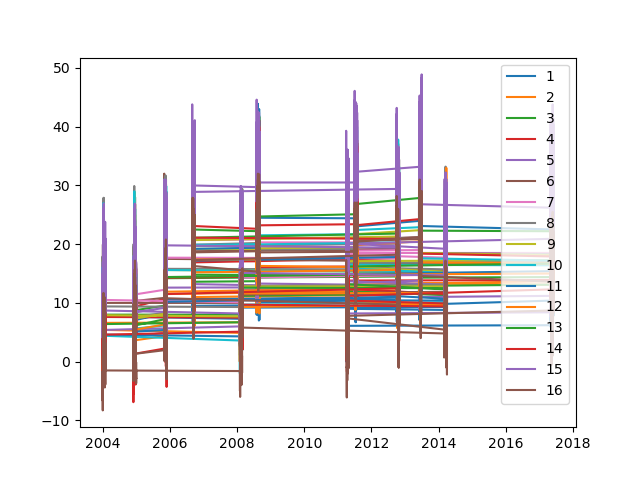

In [5]:
fig, ax = plt.subplots()
for zone in climate_zones:
    zoneData = data[data["ClimateZone"]==zone]
    ax.plot(zoneData.index, zoneData["Dry Bulb Temperature"], label=zone)
ax.legend()

/var/folders/z4/gbjchz2x4hs8f0k6b6t8m5jm0000gn/T/ipykernel_2147/1396995998.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cooling_degree.append(np.max([0, (daily_highs[i] + daily_lows[i])/2 - coolingDegBase]))
/var/folders/z4/gbjchz2x4hs8f0k6b6t8m5jm0000gn/T/ipykernel_2147/1396995998.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if daily_lows[i+1] < coolingThreshold:
/var/folders/z4/gbjchz2x4hs8f0k6b6t8m5jm0000gn/T/ipykernel_2147/1396995998.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with

<Axes: ylabel='Count'>

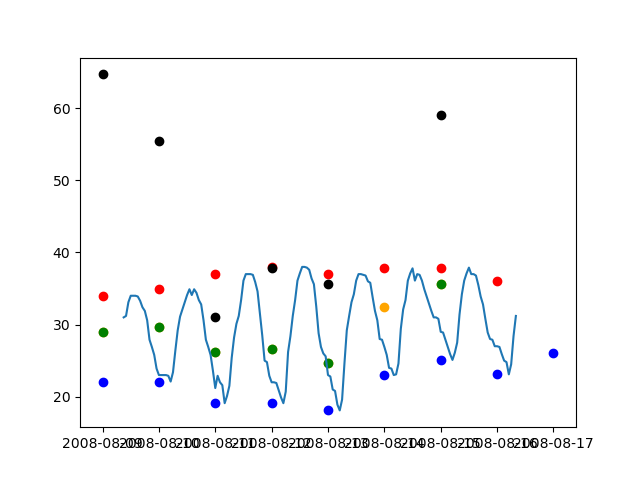

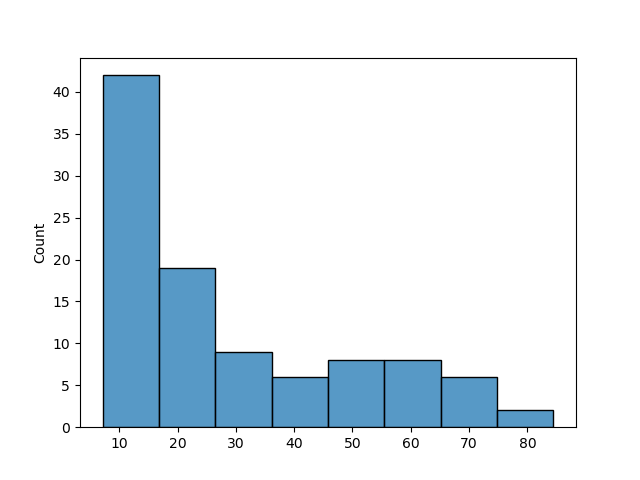

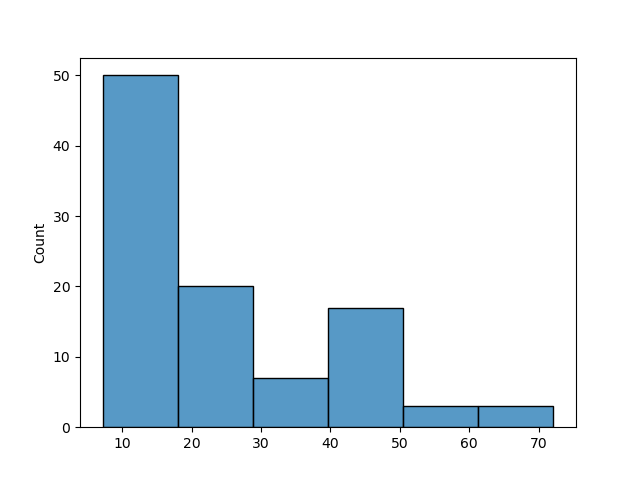

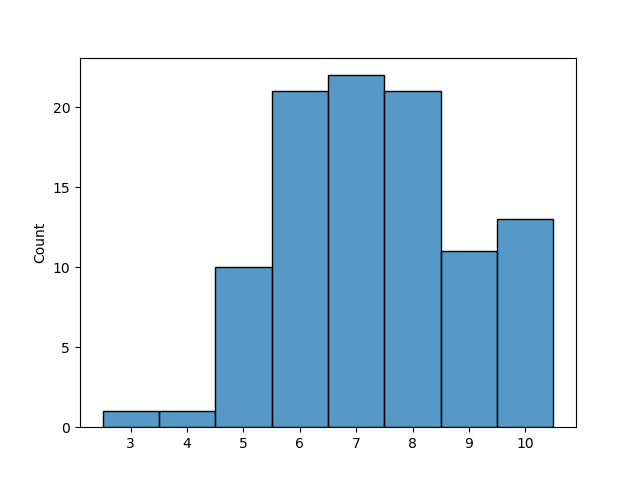

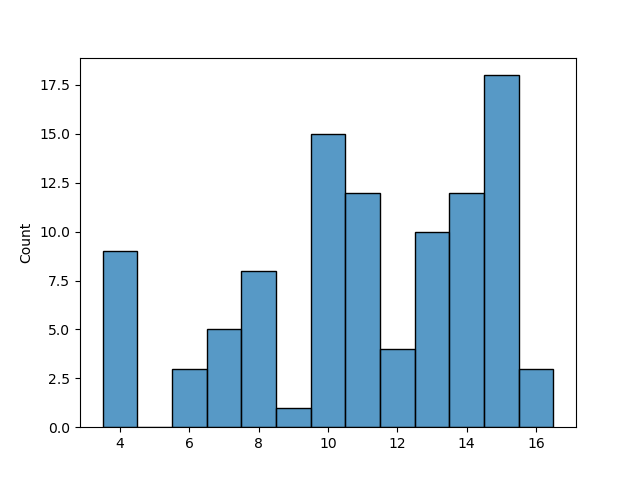

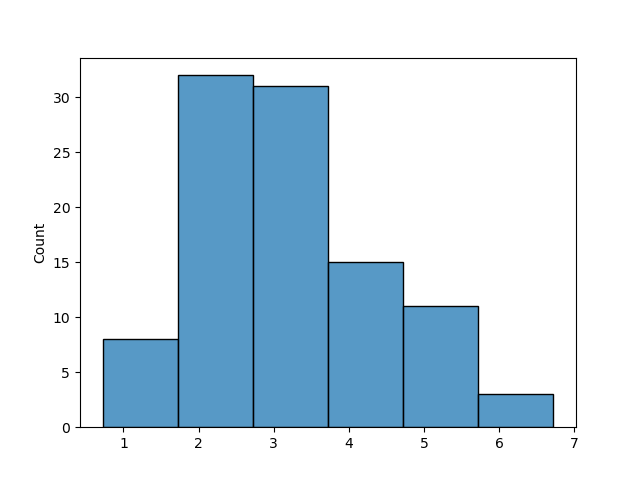

In [65]:
toPlot = True
weatherProperties = {
    "zone": [],
    "month": [],
    "cooling_degree_days": [],
    "ventilation_degree_days": [],
    "ventilation_wind": []
}

coolingThreshold = 24
coolingDegBase = 21 #18
dt = 60 * 60
daySteps = int(24 * 60 * 60 / dt)
hStartOffset = 8
startOffsetSteps = int(hStartOffset * 60 * 60 / dt)
runDays = 7
weatherDays = runDays + int(np.ceil(hStartOffset / 24))
runSteps = int(runDays * daySteps)
weatherSteps = int(weatherDays * daySteps)

N = 1000
n = 0
while n < N:
    chosenZone = random.choice(list(climate_zones.keys()))
    chosenMonth = random.randint(1, 12)
    dataZoneMonth = data[(data["ClimateZone"]==chosenZone) & (data.index.month==chosenMonth)]
    year = sp.stats.mode(dataZoneMonth.index.year.values).mode
    dataZoneMonth = dataZoneMonth[dataZoneMonth.index.year==year]

    totalSteps, _ = dataZoneMonth.shape
    startStep = random.randrange(0, totalSteps-weatherSteps, daySteps)
    chosenData = dataZoneMonth.iloc[startStep : startStep + weatherSteps]

    daily_highs = chosenData.resample('D')['Dry Bulb Temperature'].max()[0:-1]
    daily_lows = chosenData.resample('D')['Dry Bulb Temperature'].min()
    daily_wind = chosenData.resample('D')['Wind Speed'].mean()

    cooling_degree = []
    vent_degree = []
    vent_wind = []
    for i in range(runDays):
        cooling_degree.append(np.max([0, (daily_highs[i] + daily_lows[i])/2 - coolingDegBase]))
        if daily_lows[i+1] < coolingThreshold:
            vent_degree.append(cooling_degree[i])
            vent_wind.append(daily_wind[i])
        else:
            vent_degree.append(0)

    cooling_degree_days = np.sum(cooling_degree)
    vent_degree_days = np.sum(vent_degree)
    if vent_degree_days <= runDays:
        continue
    n += 1
    weatherProperties["zone"].append(chosenZone)
    weatherProperties["month"].append(chosenMonth)
    weatherProperties["cooling_degree_days"].append(cooling_degree_days)
    weatherProperties["ventilation_degree_days"].append(vent_degree_days)
    weatherProperties["ventilation_wind"].append(np.mean(vent_wind))

    chosenData = chosenData.iloc[startOffsetSteps : runSteps + startOffsetSteps]

    if toPlot:
        toPlot = False
        plt.figure()
        plt.plot(chosenData.index, chosenData["Dry Bulb Temperature"])
        plt.scatter(daily_highs.index, daily_highs, color='red')
        plt.scatter(daily_lows.index, daily_lows, color='blue')
        for i in range(runDays):
            if cooling_degree[i] > 0:
                plt.scatter(daily_highs.index[i], daily_lows[i]+cooling_degree[i], color='orange')
            if vent_degree[i] > 0:
                plt.scatter(daily_highs.index[i], daily_lows[i]+vent_degree[i], color='green')
                plt.scatter(daily_highs.index[i], vent_wind.pop(0)*10, color='black')

plt.figure(); sns.histplot(weatherProperties["cooling_degree_days"], binwidth=10)
plt.figure(); sns.histplot(weatherProperties["ventilation_degree_days"], binwidth=10)
plt.figure(); sns.histplot(weatherProperties["month"], binwidth=1, discrete=True)             
plt.figure(); sns.histplot(weatherProperties["zone"], binwidth=1, discrete=True)              
plt.figure(); sns.histplot(weatherProperties["ventilation_wind"], binwidth=1, discrete=True) 


In [ ]:

radiation_keys = ["Extraterrestrial Horizontal Radiation",
    "Extraterrestrial Direct Normal Radiation" ,
    "Horizontal Infrared Radiation Intensity" ,
    "Global Horizontal Radiation" ,
    "Direct Normal Radiation" ,
    "Diffuse Horizontal Radiation" ]
fig = px.line(data, x = data.index, y = radiation_keys)
fig.show()

In [ ]:
data["Total Sky Radiation"] = data["Horizontal Infrared Radiation Intensity"] + data["Global Horizontal Radiation"]
data["Equivalent Sky Temperature"] = (data["Total Sky Radiation"] / 5.67e-8)**0.25 - 273.15

fig = px.line(data, x = data.index, y = [
    "Horizontal Infrared Radiation Intensity",
    "Global Horizontal Radiation",
    "Total Sky Radiation",
    ])
fig.show()

fig = px.line(data, x = data.index, y = [
    "Equivalent Sky Temperature",
    "Dry Bulb Temperature",
    ])
fig.show()